## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [67]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [68]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [69]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [70]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [71]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [72]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [73]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [74]:

# view the structure of the model
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [75]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [76]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [77]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [78]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [79]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2 steps, validate for 2 steps
Epoch 1/5
2/2 [==============================] - 27s 14s/step - loss: 4.8157 - accuracy: 0.4062 - val_loss: 8.9823 - val_accuracy: 0.3276
Epoch 2/5
2/2 [==============================] - 22s 11s/step - loss: 6.7594 - accuracy: 0.5938 - val_loss: 12.2410 - val_accuracy: 0.3276
Epoch 3/5
2/2 [==============================] - 22s 11s/step - loss: 0.9376 - accuracy: 0.8906 - val_loss: 14.1595 - val_accuracy: 0.3276
Epoch 4/5
2/2 [==============================] - 21s 10s/step - loss: 1.1360 - accuracy: 0.9219 - val_loss: 15.6251 - val_accuracy: 0.3276
Epoch 5/5
2/2 [==============================] - 22s 11s/step - loss: 1.7595 - accuracy: 0.9062 - val_loss: 18.2626 - val_accuracy: 0.3276


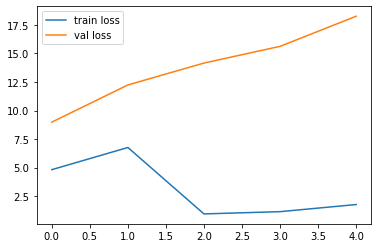

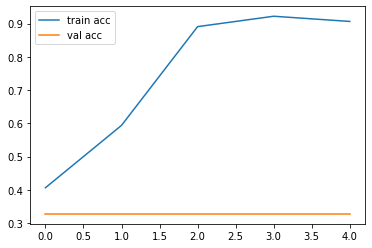

<Figure size 432x288 with 0 Axes>

In [81]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [82]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [83]:

y_pred = model.predict(test_set)


In [84]:
y_pred

array([[1.72658485e-17, 3.15305914e-14, 1.00000000e+00],
       [1.44285156e-18, 1.04114977e-14, 1.00000000e+00],
       [1.72185482e-18, 2.45480757e-15, 1.00000000e+00],
       [1.69613023e-18, 5.67724129e-15, 1.00000000e+00],
       [1.58277143e-18, 3.13576086e-15, 1.00000000e+00],
       [4.46850329e-18, 1.18827149e-13, 1.00000000e+00],
       [3.54525992e-19, 4.03665452e-15, 1.00000000e+00],
       [6.27264810e-19, 4.79972067e-15, 1.00000000e+00],
       [1.86832241e-17, 2.78132331e-14, 1.00000000e+00],
       [2.50938722e-18, 1.34208999e-14, 1.00000000e+00],
       [1.44070657e-18, 6.03744714e-15, 1.00000000e+00],
       [1.29441017e-18, 4.11096641e-15, 1.00000000e+00],
       [4.26931158e-18, 6.29958190e-14, 1.00000000e+00],
       [3.45607537e-18, 8.87510704e-15, 1.00000000e+00],
       [2.06131713e-18, 1.81756974e-14, 1.00000000e+00],
       [1.03641626e-18, 5.46802458e-15, 1.00000000e+00],
       [1.00217139e-18, 5.56380283e-15, 1.00000000e+00],
       [1.82711066e-18, 1.86024

In [85]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [86]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [87]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [88]:
model=load_model('model_resnet50.h5')

In [89]:
#img_data

In [90]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [91]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [92]:
x.shape

(224, 224, 3)

In [93]:
x=x/255

In [94]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [95]:
model.predict(img_data)

array([[2.2220233e-10, 4.6077218e-07, 9.9999952e-01]], dtype=float32)

In [96]:
a=np.argmax(model.predict(img_data), axis=1)

In [97]:
a==1

array([False])

In [98]:
import tensorflow as tf
tf.version.VERSION

'2.1.0'